In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.filters import gaussian
from skimage.morphology import reconstruction
from skimage.io import imread
from skimage.color import rgb2grey
# Convert to float: Important for subtraction later which won't work with uint8
sudoku = imread('resources/download.png')

[[886.          68.           6.44444444]
 [879.          20.          11.88888889]
 [858.          54.           6.44444444]
 [828.          52.           6.44444444]
 [765.         850.           6.44444444]
 [746.         352.           6.44444444]
 [732.         846.           6.44444444]
 [630.         551.           6.44444444]
 [623.         147.           6.44444444]
 [569.         550.           6.44444444]
 [530.          55.           6.44444444]
 [439.         746.           6.44444444]
 [332.         353.           6.44444444]
 [278.         745.           6.44444444]
 [240.         746.           6.44444444]
 [178.         650.           6.44444444]
 [166.         652.           6.44444444]
 [159.          54.           6.44444444]
 [140.         545.           6.44444444]
 [138.         649.           6.44444444]
 [ 36.         453.           6.44444444]]


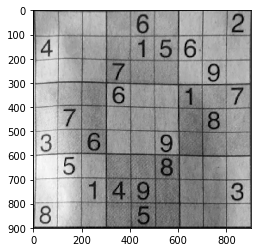

In [2]:
from skimage.filters import threshold_adaptive, threshold_yen, threshold_local
from skimage.feature import blob_log

image = rgb2grey(sudoku)
image = gaussian(image)
plt.imshow(image, cmap='gray')
print blob_log(image)

In [3]:
# '''
# ======================
# 3D surface (color map)
# ======================

# Demonstrates plotting a 3D surface colored with the coolwarm color map.
# The surface is made opaque by using antialiased=False.

# Also demonstrates using the LinearLocator and custom formatting for the
# z axis tick labels.
# '''

# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# import numpy as np


# fig = plt.figure(figsize=(10,10))
# ax = fig.gca(projection='3d')

# # Make data.
# X = np.arange(0,900,1)
# Y = np.arange(0,900,1)
# X, Y = np.meshgrid(X, Y)
# Z = image
# print Z.shape
# # Plot the surface.
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

# # Customize the z axis.
# ax.set_zlim(0, 1)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.show()

/Users/muthukrishna/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


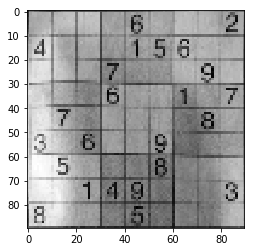

In [4]:
from skimage.transform import resize 

resized_img = resize(image,(90,90))
plt.imshow(resized_img,cmap='gray')

{'boxes': [<matplotlib.lines.Line2D at 0x10abb5d90>],
 'caps': [<matplotlib.lines.Line2D at 0x10ba43c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x10ba50790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10ba503d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10ba43490>,
  <matplotlib.lines.Line2D at 0x10ba43850>]}

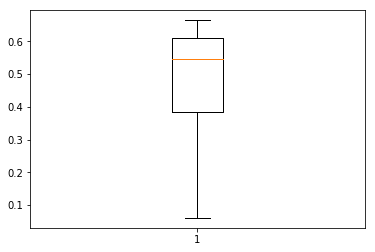

In [5]:
plt.boxplot(resized_img[0:10,40:50].reshape(100))

In [6]:
# ninety = inv_img.reshape(90*90)
# t5 = np.percentile(ninety, 25)
# s5 = np.percentile(ninety, 75)
# print t5, s5

In [7]:
# ninety[ninety>s5] = 0
# ninety[ninety<t5] = 0

In [8]:
# ninety = ninety.reshape(90,90)
# plt.imshow(inv_img[0:10,40:50], cmap='gray')

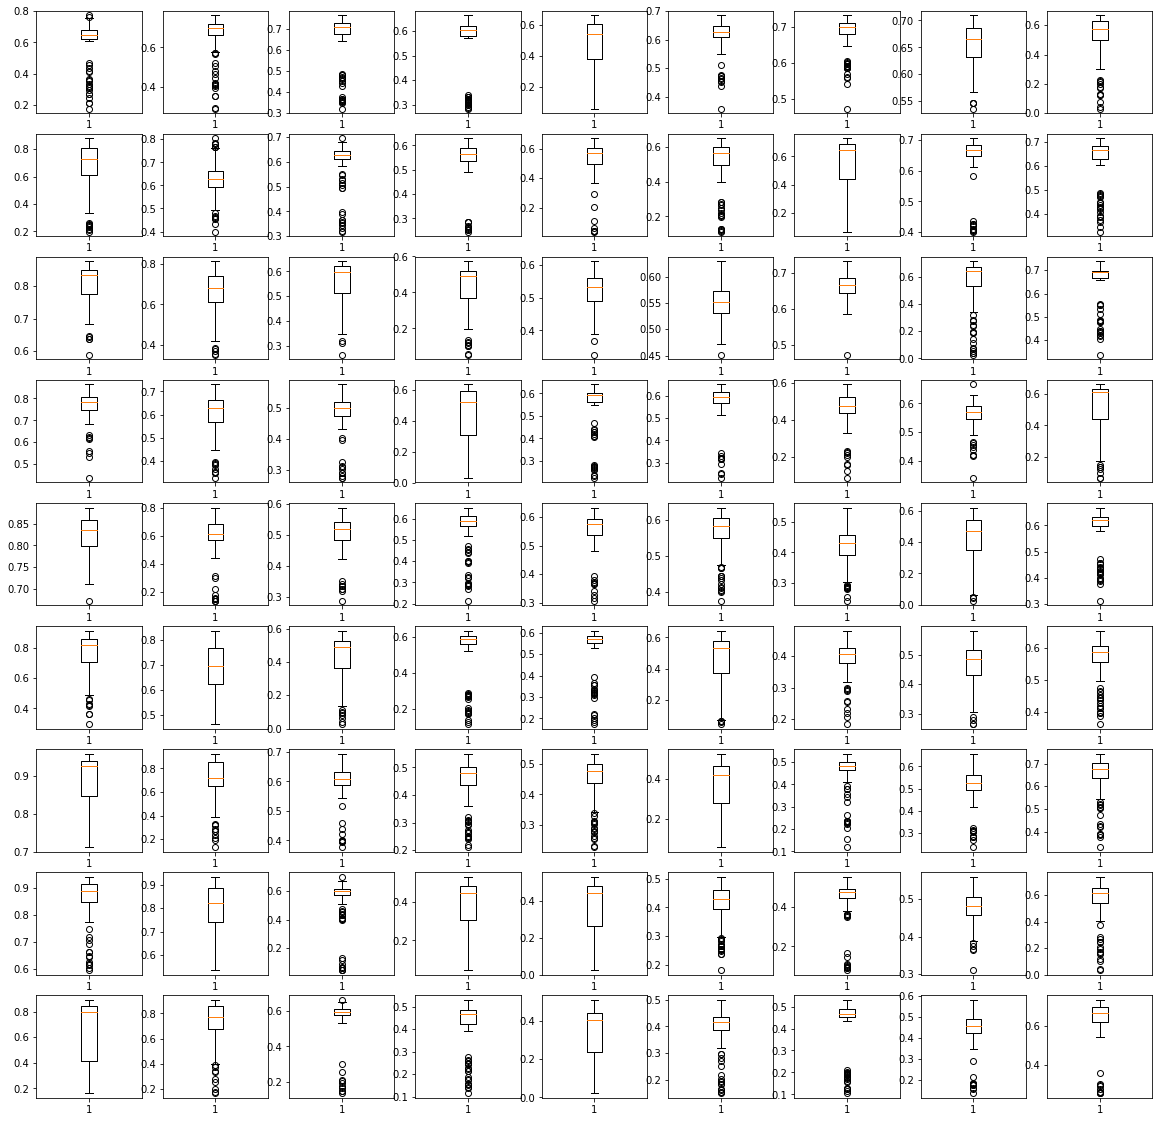

In [9]:
fig, ax = plt.subplots(nrows=9, ncols=9, figsize=(20,20))
def getdata():
    return resized_img[row*10:row*10+10,col*10:col*10+10].reshape(100)

for row in range(9):
    for col in range(9):
        data = getdata()
        ax[row][col].boxplot(data)

In [10]:
# fig, ax = plt.subplots(nrows=9, ncols=9, figsize=(20,20))
def getdata():
    return resized_img[row*10:row*10+10,col*10:col*10+10].reshape(100)

almed = np.zeros((9, 9))
for row in range(9):
    for col in range(9):
#         ax[row][col].axis("off")
        data = getdata()
#         ax[row][col].boxplot(data)
        median = np.median(data)*100
        almed[row,col] = np.around(median, decimals=1)

print almed

allmean = np.zeros((9, 9))
print "mean"
for row in range(9):
    for col in range(9):
#         ax[row][col].axis("off")
        data = getdata()
        mean = np.mean(data)*100
        allmean[row,col] = np.around(mean, decimals=1)
    
print allmean

[[64.8 69.9 71.  60.4 54.5 62.7 69.9 66.5 57.7]
 [72.6 62.8 62.7 56.6 57.3 56.8 64.2 66.7 66.4]
 [83.2 67.9 59.8 48.9 53.3 55.2 66.6 64.1 69.1]
 [78.6 62.7 49.8 52.2 59.1 59.7 47.8 56.9 61.2]
 [83.5 61.8 51.7 59.  57.4 58.2 43.1 47.1 61.8]
 [81.6 69.5 48.9 59.  56.9 53.5 40.9 48.5 58.7]
 [92.7 71.9 60.7 48.1 47.6 41.6 48.5 52.7 67.5]
 [88.7 82.  59.8 44.5 44.  43.  47.2 48.1 61.5]
 [80.1 77.  59.7 46.6 40.2 41.5 46.8 45.8 66.8]]
mean
[[59.9 65.6 65.6 55.5 48.4 61.3 68.  65.3 51.7]
 [67.2 62.7 59.8 53.9 53.  51.1 55.5 64.2 61.9]
 [80.9 65.8 55.4 42.5 52.  55.  66.1 55.1 65.1]
 [76.7 60.2 48.1 45.3 54.5 56.9 45.9 56.  52.4]
 [82.3 59.  50.2 55.  54.9 56.2 41.9 42.1 58.5]
 [75.1 68.8 42.6 52.4 52.1 45.7 39.3 46.5 56.3]
 [89.8 70.2 59.5 44.8 44.5 35.9 45.4 50.9 64.5]
 [85.6 80.6 53.9 38.4 36.4 40.8 43.1 47.6 55.7]
 [66.5 73.3 55.8 42.  33.9 38.5 41.9 43.1 62.9]]


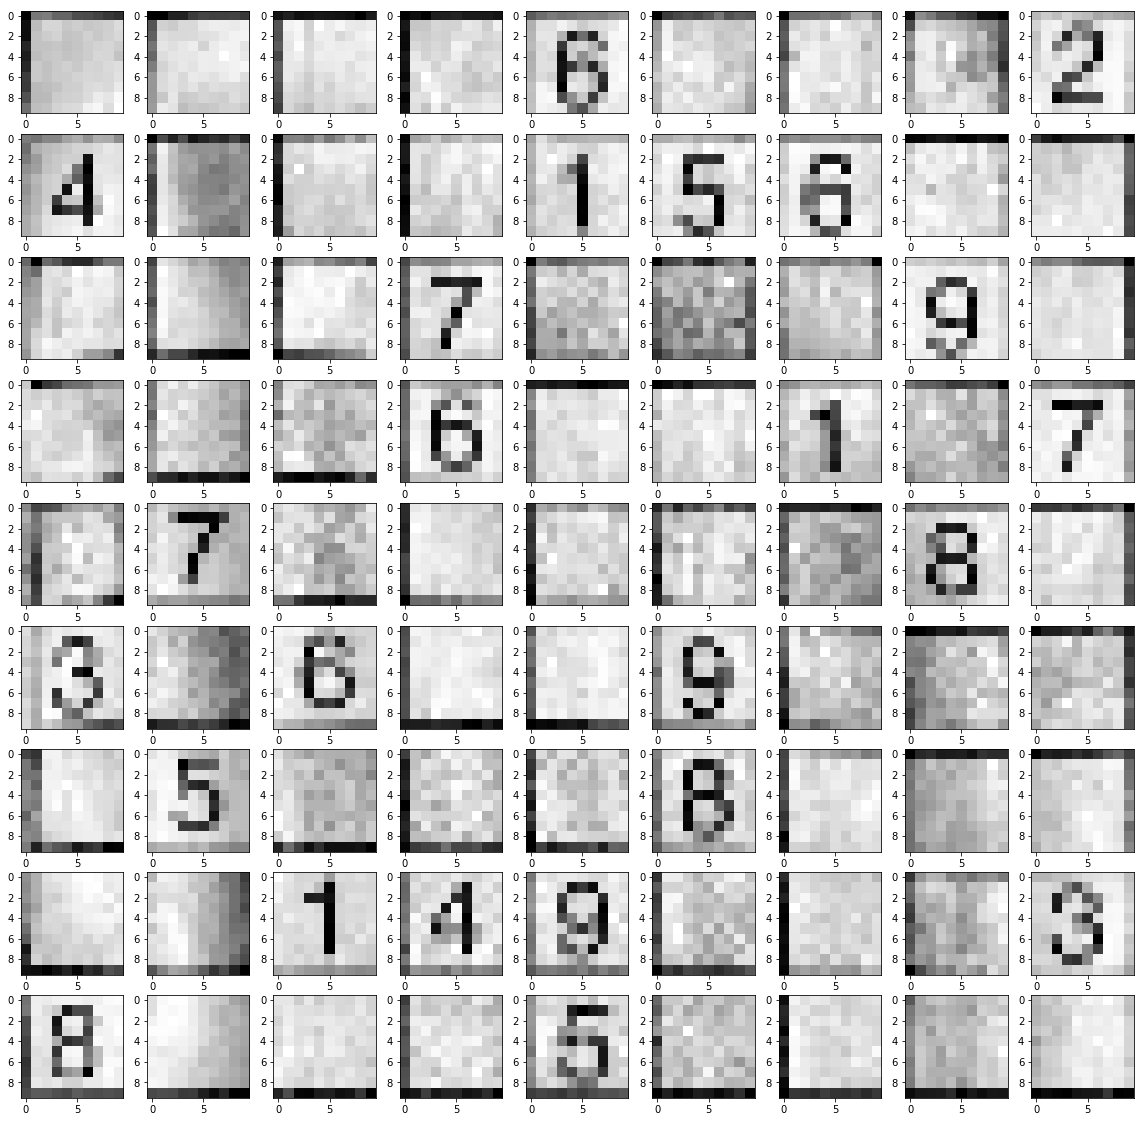

In [11]:
fig, ax = plt.subplots(nrows=9, ncols=9, figsize=(20,20))
def getimagdata():
    return resized_img[row*10:row*10+10,col*10:col*10+10]

for row in range(9):
    for col in range(9):
        data = getimagdata()
        ax[row][col].imshow(data, cmap="gray")

NameError: global name 'resized_img_45' is not defined

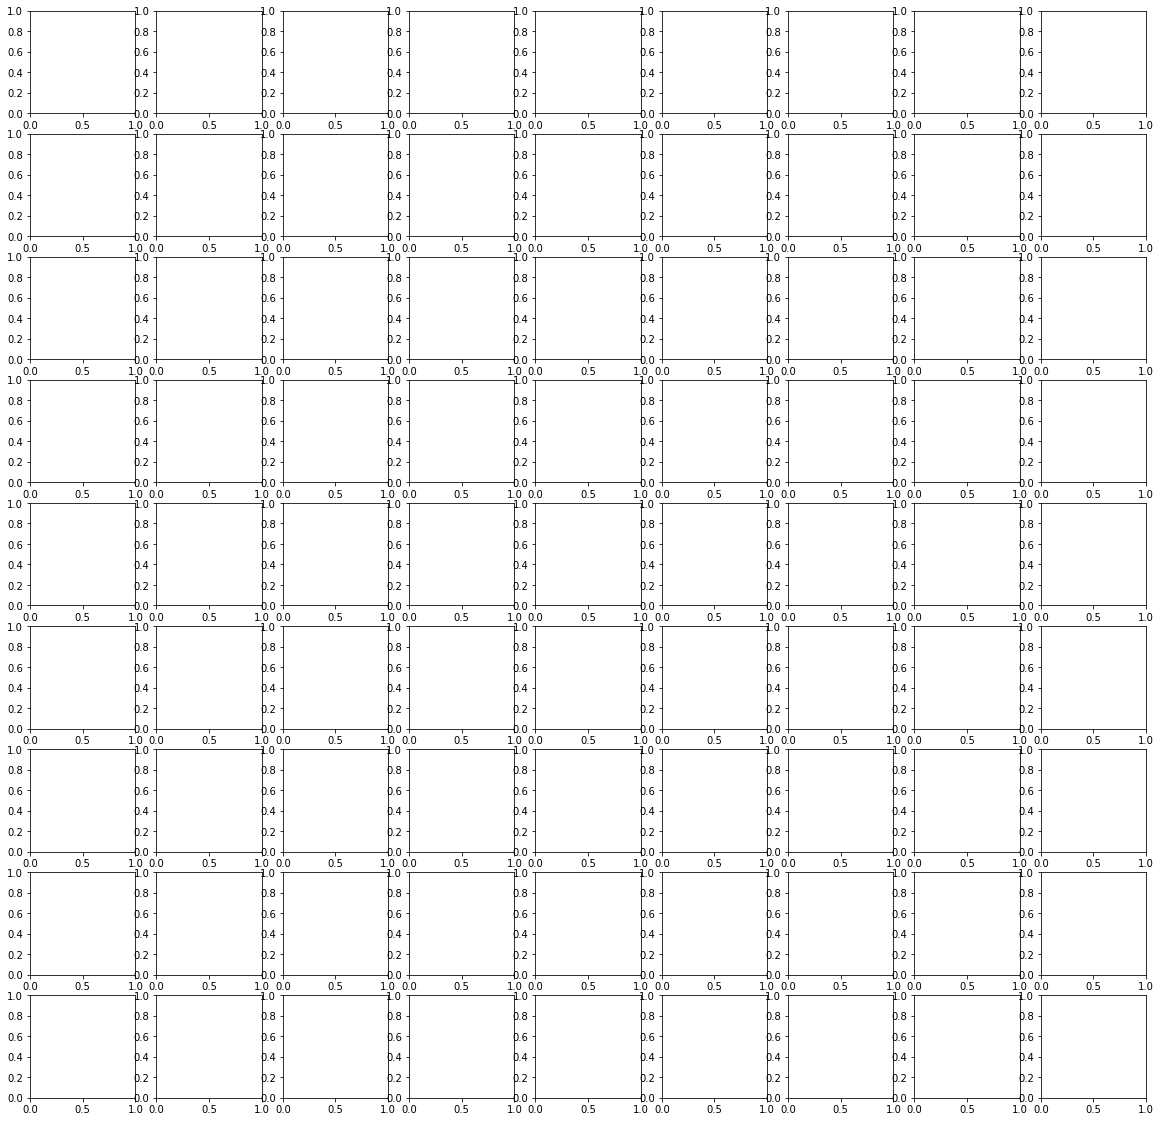

In [12]:
fig, ax = plt.subplots(nrows=9, ncols=9, figsize=(20,20))
def getimagdata45_flat():
    return resized_img_45[row*5:row*5+5,col*5:col*5+5].reshape(25)

for row in range(9):
    for col in range(9):
        data = getimagdata45_flat()
        ax[row][col].boxplot(data)